# Farm Yeild Data Analytics

In [2]:
#Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'C:\\Users\\mahip_cpp2xf3\\Datalake-ml-mz\\Datasets': ['.ipynb_checkpoints', 'blank file', 'dataset - 1.csv', 'dataset - 2.csv', 'farm_yield.ipynb', 'rough_sheet.py']


## 1. Data Exploration

In [4]:
#Import dataset files
df1 = pd.read_csv('C://Users/mahip_cpp2xf3/Datalake-ml-mz/Datasets/dataset - 1.csv')
df2 = pd.read_csv('C://Users/mahip_cpp2xf3/Datalake-ml-mz/Datasets/dataset - 2.csv')

#Print top row of df1
df1.head()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,categories
0,169,5.615,65.281,3.230,0,7.977,8.969,0,"b,a,c"
1,476,7.044,73.319,9.081,0,23.009,7.197,0,"c,a,d"
2,152,5.607,60.038,2.864,2,23.019,7.424,0,"d,a"
3,293,9.346,64.719,2.797,2,28.066,1.256,0,d
4,10,7.969,NaN,5.407,1,29.140,0.274,0,"c,d"


In [5]:
#print top rows of df2
df2.head()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,categories
0,747,8.132,90.752,6.991,0,39.963,5.793,0,"d,a,b"
1,920,4.381,68.231,6.344,0,40.603,5.276,0,"b,c,a"
2,479,4.217,64.047,6.504,1,41.139,0.913,0,"b,c,a,d"
3,338,3.472,NaN,5.474,1,43.149,4.316,0,"a,d"
4,437,6.628,75.638,9.898,0,43.647,5.098,0,b


In [6]:
#Check the dataset size
print("df1 size =",df1.shape)
print("df2 size =",df2.shape)

df1 size = (17, 9)
df2 size = (983, 9)


In [7]:
#Combine both datasets into one
df = pd.concat([df1,df2], ignore_index=True)

#Check the size of merged dataset
print('df size =',df.shape)

df size = (1000, 9)


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1000 non-null   int64  
 1   water             958 non-null    float64
 2   uv                949 non-null    float64
 3   area              1000 non-null   float64
 4   fertilizer_usage  1000 non-null   int64  
 5   yield             1000 non-null   float64
 6   pesticides        1000 non-null   float64
 7   region            1000 non-null   int64  
 8   categories        1000 non-null   object 
dtypes: float64(5), int64(3), object(1)
memory usage: 70.4+ KB
None


In [9]:
#Separate records with missing values and drop from the dataframe
df_missing = df[(df.water.isna())|(df.uv.isna())]
df = df.dropna()
df.isna().sum()
#df_missing.info()

id                  0
water               0
uv                  0
area                0
fertilizer_usage    0
yield               0
pesticides          0
region              0
categories          0
dtype: int64

In [12]:
#Check number of regions
df.region.unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [13]:
#Convert data type for 'region' field
df['region'] = df.region.astype('category')

In [14]:
#Add target variable column 'yield_per_hectare'
df['yield_per_hectare'] = df['yield']/df['area']
df['yield_per_hectare'] = df.yield_per_hectare.round(decimals=4)

df.columns

Index(['id', 'water', 'uv', 'area', 'fertilizer_usage', 'yield', 'pesticides',
       'region', 'categories', 'yield_per_hectare'],
      dtype='object')

In [15]:
df.head()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,categories,yield_per_hectare
0,169,5.615,65.281,3.230,0,7.977,8.969,0,"b,a,c",2.4697
1,476,7.044,73.319,9.081,0,23.009,7.197,0,"c,a,d",2.5338
2,152,5.607,60.038,2.864,2,23.019,7.424,0,"d,a",8.0374
3,293,9.346,64.719,2.797,2,28.066,1.256,0,d,10.0343
5,564,5.920,78.735,5.245,2,29.507,1.136,0,b,5.6257


In [16]:
#set id column as index
df = df.set_index('id')

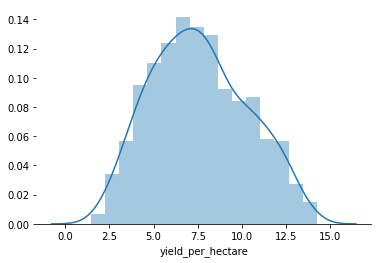

In [36]:
sns.distplot(df['yield_per_hectare'])
sns.despine(left=True)

### A. Effect of Pesticide on Yield

In [17]:
#Assess the 'categories' field
df.categories.unique()

array(['b,a,c', 'c,a,d', 'd,a', 'd', 'b', 'b,c,a,d', 'c,b', 'd,b,c',
       'b,c', 'c,b,d', 'c,a', 'd,a,b', 'b,c,a', 'b,a', 'b,c,d,a', 'c',
       'b,d,c', 'c,a,d,b', 'c,b,d,a', 'a,c,b,d', 'a', 'b,d,c,a',
       'a,c,d,b', 'b,a,d', 'c,b,a', 'd,b', 'b,c,d', 'c,a,b', 'b,d',
       'd,a,c,b', 'a,c', 'b,a,d,c', 'd,c,a', 'c,d,a', 'a,b', 'd,c',
       'd,c,b', 'd,b,a,c', 'a,c,d', 'a,d,b', 'd,a,c', 'a,b,c', 'b,d,a',
       'd,b,c,a', 'c,d', 'd,c,b,a', 'a,c,b', 'd,a,b,c', 'b,a,c,d',
       'a,b,c,d', 'd,b,a', 'c,d,b', 'a,d', 'c,b,a,d', 'b,d,a,c',
       'c,a,b,d', 'a,d,c,b', 'c,d,a,b', 'a,d,b,c', 'c,d,b,a', 'a,b,d',
       'd,c,a,b'], dtype=object)

In [18]:
df['categories'] = df['categories'].str.replace(",","")
df.head()

,water,uv,area,fertilizer_usage,yield,pesticides,region,categories,yield_per_hectare
id,,,,,,,,,
169,5.615,65.281,3.230,0,7.977,8.969,0,bac,2.4697
476,7.044,73.319,9.081,0,23.009,7.197,0,cad,2.5338
152,5.607,60.038,2.864,2,23.019,7.424,0,da,8.0374
293,9.346,64.719,2.797,2,28.066,1.256,0,d,10.0343
564,5.920,78.735,5.245,2,29.507,1.136,0,b,5.6257


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='char')
test = vectorizer.fit_transform(df['categories'])
print(vectorizer.get_feature_names_out())

print(test.toarray())

['a' 'b' 'c' 'd']
[[1 1 1 0]
 [1 0 1 1]
 [1 0 0 1]
 ...
 [0 1 1 0]
 [0 1 1 1]
 [1 0 0 0]]


In [20]:
cat_list = ['pesticide_a', 'pesticide_b', 'pesticide_c', 'pesticide_d']

df[cat_list] = test.toarray()

df = df.drop('categories', axis=1)

df.head()

,water,uv,area,fertilizer_usage,yield,pesticides,region,yield_per_hectare,pesticide_a,pesticide_b,pesticide_c,pesticide_d
id,,,,,,,,,,,,
169,5.615,65.281,3.230,0,7.977,8.969,0,2.4697,1,1,1,0
476,7.044,73.319,9.081,0,23.009,7.197,0,2.5338,1,0,1,1
152,5.607,60.038,2.864,2,23.019,7.424,0,8.0374,1,0,0,1
293,9.346,64.719,2.797,2,28.066,1.256,0,10.0343,0,0,0,1
564,5.920,78.735,5.245,2,29.507,1.136,0,5.6257,0,1,0,0


In [46]:
df['no_of_pesticides'] = df['pesticide_a']+df['pesticide_b']+df['pesticide_c']+df['pesticide_d']
df.head(2)

,water,uv,area,fertilizer_usage,yield,pesticides,region,yield_per_hectare,pesticide_a,pesticide_b,pesticide_c,pesticide_d,no_of_pesticides
id,,,,,,,,,,,,,
169,5.615,65.281,3.230,0,7.977,8.969,0,2.4697,1,1,1,0,3
476,7.044,73.319,9.081,0,23.009,7.197,0,2.5338,1,0,1,1,3


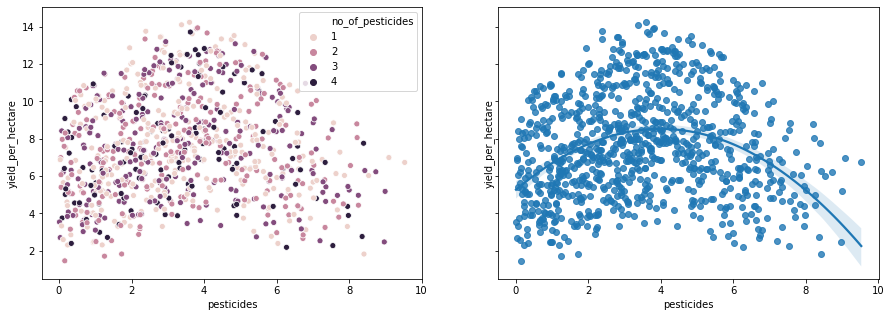

In [63]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,5))

sns.scatterplot(x='pesticides', y='yield_per_hectare', data=df, hue='no_of_pesticides', ax=ax0)
sns.regplot(x='pesticides', y='yield_per_hectare', data=df, order=2, ax=ax1)

* From a high level look, number of different pesticides used have no clear effect on the yield produced per hectare. However, amount of pesticide used does show rise in yield up to certain amount and then it starts to decline with further increase in pesticide usage.

In [58]:
df.groupby(['pesticide_a', 'pesticide_b', 'pesticide_c', 'pesticide_d'])['yield_per_hectare'].median().sort_values(ascending=False)

pesticide_a  pesticide_b  pesticide_c  pesticide_d
1            0            0            1              9.25835
0            0            0            1              9.12630
1            0            0            0              8.62980
0            0            1            1              8.27850
1            0            1            1              8.21475
             1            1            0              7.69410
                          0            0              7.59100
                                       1              7.37900
0            1            1            1              7.30610
1            0            1            0              7.29995
             1            1            1              7.17740
0            1            1            0              7.01265
                          0            0              6.85930
             0            1            0              6.44860
             1            0            1              6.38710
Name: yield_per_hec

* If we look closely, from the table above we can say pesticide a, d and their other combinations does have higher median yield per hectare.

### B. Regional Analysis

[]

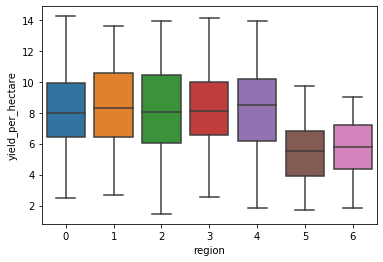

In [23]:
#Regional analysis
_ = sns.boxplot('region', 'yield_per_hectare', data=df)
plt.plot()

* If we assume no other factors affecting yield, Region 5 and 6 can be relatively less fertile than other regions based on above box-plot. 

[]

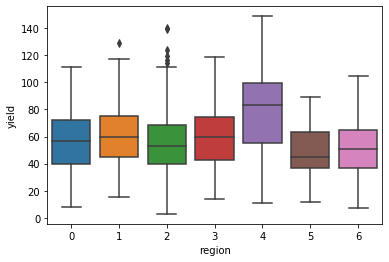

In [64]:
_ = sns.boxplot('region', 'yield', data=df)
plt.plot()

* We see similar trend when compared just the yield with different regions. Region 4 is clearly largest producer though!

### C. Water usage

In [29]:
#df[df['water']>5000]
df.drop([586], axis=0, inplace=True)

[]

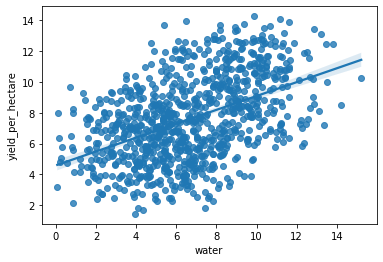

In [68]:
#water vs yield
_ = sns.regplot(x='water', y='yield_per_hectare', data=df)
plt.plot()

* As expected, better irrigation leads to higher yield per hectare.

### D. Exposure to Sunlight

[]

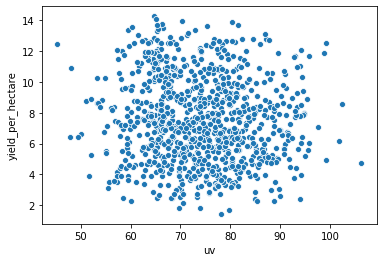

In [71]:
#UV vs yield
_ = sns.scatterplot('uv', 'yield_per_hectare', data=df)
plt.plot()

* No clear relationship can be drawn between uv exposure and yield per hectare.

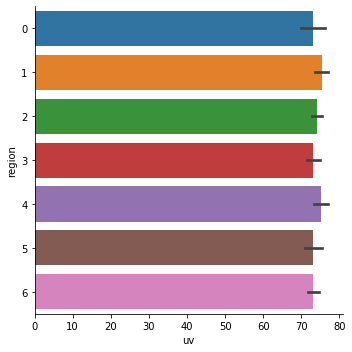

In [81]:
sns.catplot(x='uv', y='region', data=df, kind='bar')

* All regions are exposed to almost same amout of sunlight. They must be located in one geographical region.

### E. Fertilizer Usage

In [69]:
#We can drop 'yield' and 'area' fields as the information is included in 'yield-per_hectare'.
df = df.drop(['yield','area'], axis=1)

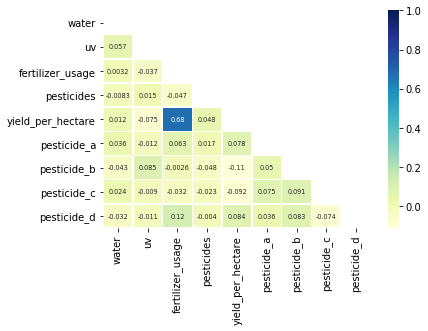

In [65]:
#Visualize the correlation between the fields using a heatmap
plt.clf()
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap="YlGnBu",linewidths=0.5,annot=True,annot_kws={"size":6.5},mask=mask)
plt.show()

* Clearly, level of fertilization is highly correlated to yield per hectare.

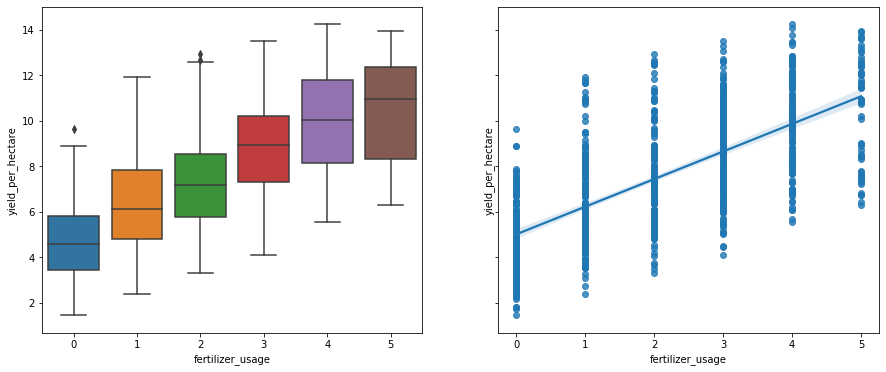

In [85]:
#Let's visualize the highly correlated variable with target vaiable
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,6))

sns.boxplot(x='fertilizer_usage', y='yield_per_hectare', data=df, ax=ax0)
sns.regplot(x='fertilizer_usage', y='yield_per_hectare', data=df, ax=ax1)

* Higher the level of fertilization, more the yield per hectare.

## Target Prediction

In [68]:
#Import tools
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet, Ridge, Lasso

In [69]:
#Define X and y
y = df['yield_per_hectare'].values
X = df.drop('yield_per_hectare', axis=1)

In [70]:
#Get dummies for categorical features
X = pd.get_dummies(data=X, drop_first=True)

X.head()

,water,uv,fertilizer_usage,pesticides,pesticide_a,pesticide_b,pesticide_c,pesticide_d,region_1,region_2,region_3,region_4,region_5,region_6
id,,,,,,,,,,,,,,
169,5.615,65.281,0,8.969,1,1,1,0,0,0,0,0,0,0
476,7.044,73.319,0,7.197,1,0,1,1,0,0,0,0,0,0
152,5.607,60.038,2,7.424,1,0,0,1,0,0,0,0,0,0
293,9.346,64.719,2,1.256,0,0,0,1,0,0,0,0,0,0
564,5.920,78.735,2,1.136,0,1,0,0,0,0,0,0,0,0


In [44]:
#Setup the pipeline steps for Ridge regression
steps = [('scaler', StandardScaler()),
        ('ridge', Ridge())]

#Create the pipeline
pipeline = Pipeline(steps)

#Specify the hyperparameter space
parameters = {'ridge__alpha':np.linspace(0,1,30)}

#Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

#Create cv object
df_cv = GridSearchCV(pipeline, parameters)

#Fit to the training set
df_cv.fit(X_train, y_train)

#Compute and print the metrics
r2 = df_cv.score(X_test, y_test)

print("Tuned Ridge Alpha: {}".format(df_cv.best_params_))
print("Tuned Ridge R squared: {}".format(r2))

Tuned Ridge Alpha: {'ridge__alpha': 1.0}
Tuned Ridge R squared: -790.5246517834088


In [45]:
#Setup the pipeline steps for Lasso regression
steps = [('scaler', StandardScaler()),
        ('lasso', Lasso())]

#Create the pipeline
pipeline = Pipeline(steps)

#Specify the hyperparameter space
parameters = {'lasso__alpha':np.linspace(0,1,30)}

#Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

#Create cv object
df_cv = GridSearchCV(pipeline, parameters)

#Fit to the training set
df_cv.fit(X_train, y_train)

#Compute and print the metrics
r2 = df_cv.score(X_test, y_test)

print("Tuned Lasso Alpha: {}".format(df_cv.best_params_))
print("Tuned Lasso R squared: {}".format(r2))

C:\Users\mahip_cpp2xf3\anaconda3\lib\site-packages\sklearn\pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\mahip_cpp2xf3\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\mahip_cpp2xf3\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.158e+02, tolerance: 3.682e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

Tuned Lasso Alpha: {'lasso__alpha': 0.0}
Tuned Lasso R squared: -790.7176582066903


C:\Users\mahip_cpp2xf3\anaconda3\lib\site-packages\sklearn\pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\mahip_cpp2xf3\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\mahip_cpp2xf3\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.557e+02, tolerance: 4.728e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

In [46]:
#Setup the pipeline steps for ElasticNet regression
steps = [('scaler', StandardScaler()),
        ('elasticnet', ElasticNet())]

#Create the pipeline
pipeline = Pipeline(steps)

#Specify the hyperparameter space
parameters = {'elasticnet__alpha':np.linspace(0,1,30)}

#Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

#Create cv object
df_cv = GridSearchCV(pipeline, parameters)

#Fit to the training set
df_cv.fit(X_train, y_train)

#Compute and print the metrics
r2 = df_cv.score(X_test, y_test)

print("Tuned ElasticNet Alpha: {}".format(df_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

C:\Users\mahip_cpp2xf3\anaconda3\lib\site-packages\sklearn\pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\mahip_cpp2xf3\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\mahip_cpp2xf3\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.158e+02, tolerance: 3.682e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

Tuned ElasticNet Alpha: {'elasticnet__alpha': 0.0}
Tuned ElasticNet R squared: -790.7176582066903


C:\Users\mahip_cpp2xf3\anaconda3\lib\site-packages\sklearn\pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\mahip_cpp2xf3\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\mahip_cpp2xf3\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.557e+02, tolerance: 4.728e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea